---
# <center> **Foundations of Applied Machine Learning**
## <center> Summer 2024

### <center> **Prof. Bahram Mobasher**
### <center> Teaching Assistant: **[Sina Taamoli](https://sinataamoli.github.io/)** | email: *sina.taamoli@email.ucr.edu* | [Course webpage](https://github.com/sinataamoli/Foundations-of-Applied-Machine-Learning)
### <center> Week 4 (July 25th): Monte Carlo Simulation
---

# **What is the numerical value of $\pi$?**

## There is a simple geometric approach we can use:


In [11]:
import numpy as np 
import random 
import matplotlib.pyplot as plt

# font parameters dictionary
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 18,}


# figure parameters dictionary
figure = {"figsize" : (6,6),
          "dpi" : 120,
          "facecolor" : "w", 
          "edgecolor" : "k",}



# use LaTeX fonts in the plot
plt.rc('text', usetex=True)

# ticks settings
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

# axes setting
plt.rc('axes', titlesize=22, labelsize=18)     # fontsize of the axes title, labels

# Set the font parameters
plt.rc('font', **font) 

# Set the figure parameters 
plt.rc("figure", **figure)

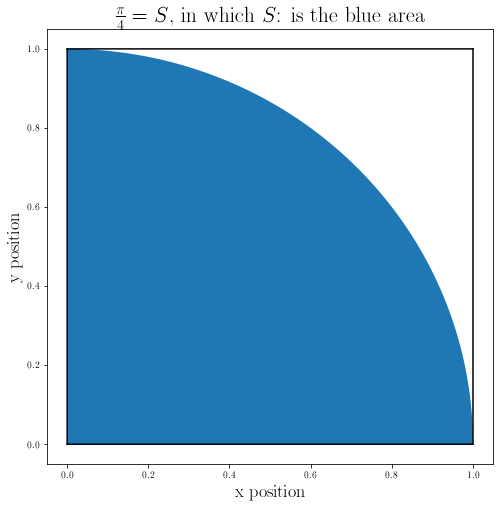

In [12]:
fig_pi = plt.figure(figsize=(8,8))


from matplotlib.patches import Rectangle
_number_of_points_=10**6

x = np.linspace(0,1, _number_of_points_)
y = np.sqrt(1-x**2)
# Plot the circle
plt.fill_between(x,y)

# There are more sophisticated ways to do this as well!
# Making the square
y1 = np.ones(10**6)
y2 = np.zeros(10**6)

# make the square plot
plt.plot(x, y1, "k")
plt.plot(x, y2, "k")
plt.plot(y2, x, "k")
plt.plot(y1, x, "k")


plt.title(r"$\frac{\pi}{4}=S$, in which $S$: is the blue area", fontsize=22)

plt.xlabel(r"x position", fontsize=18)
plt.ylabel(r"y position", fontsize=18)


plt.show()

So if we somehow manage to find the blue area we can find the numerical value for $\pi$. 

\begin{align*}
& S = \frac{\pi R^2}{4} = \frac{\pi}{4} \quad \textrm{Since we know $R=1$} \\
& \pi = 4S \quad \textrm{So we need S}
\end{align*}

### How can we find the area numerically?

First we need to get familiar with the [**Monte Carlo Simulations**](https://en.wikipedia.org/wiki/Monte_Carlo_method)

The **Monte Carlo** simulations, is a statistical technique to model stochastic (or probabilistic) systems and to find the probability of different outcome. 

Further references:
[http://mathworld.wolfram.com/MonteCarloMethod.html](http://mathworld.wolfram.com/MonteCarloMethod.html)

### First let's start with making $N$ random $(x,y)$ points from $[0,1]$ range:

In [39]:
N = 10e5
N = int(N)

x = np.random.random(N)
y = np.random.random(N)

Now we calculate the distance of each point from $(0,0)$: distance function --> d((x,y), (0,0))

In [40]:
distance_from_0_0 = np.sqrt(x**2 + y**2)

In [41]:
distance_from_0_0

array([0.2387586 , 0.91534213, 0.65569253, ..., 0.06378936, 1.03870716,
       1.10839147])

Let's count number of points with $d((x,y), (0,0)) \leq 1$

In [42]:
circle_points = distance_from_0_0[distance_from_0_0 <= 1]

Now we have an array of distances for points inside the circle ($d((x,y), (0,0)) \leq 1$):

If we define $n$ to be the number of points within circle, and $N$ to be total number of points,
We can find the area to be: 

\begin{equation*}
S = \frac{n}{N}
\end{equation*}

In [18]:
np.pi

3.141592653589793

In [43]:
PI = 4 * len(circle_points) / len(distance_from_0_0)

print(PI)

3.141304


As you can see we are getting close to the **True value**.

Let's put the above procedures inside a function: 

In [44]:
def our_PI_generator(N=10e3):
    """This is our generic code for approximating pi ~ 3.14 with Monte Carlo simulation"""
    import numpy as np
    # initializing
    N = int(N)
    
    # Produce random numbers between [0,1] for (x,y)
    x = np.random.random(N)
    y = np.random.random(N)
    
    # Find the distance of (x,y) from [0,0]
    distance_from_0_0 = np.sqrt(x**2 + y**2)
    
    # imposing the condition for the circle:  distance((x,y),(0,0))<= 0 
    circle_points = distance_from_0_0[distance_from_0_0<=1]
    
    return 4 * len(circle_points)/N  

In [47]:
our_PI_generator(10e7)

3.14159232

Let's use different number of points to see how adding to the number of points changes our numerical estimate for $\pi$:

In [48]:
np.logspace(2, 6, 10)

array([1.00000000e+02, 2.78255940e+02, 7.74263683e+02, 2.15443469e+03,
       5.99484250e+03, 1.66810054e+04, 4.64158883e+04, 1.29154967e+05,
       3.59381366e+05, 1.00000000e+06])

In [52]:
I = np.logspace(2, 6, 5000)
I = np.array([int(i) for i in I])

_x_ = [our_PI_generator(i) for i in I]

Here we assume the true value of $\pi$ is coming from `numpy.pi`. Let's find the errors of our estimates:

In [53]:
distance_from_pi = np.array(_x_) - np.pi

This is how our estimate errors change with different number of points.

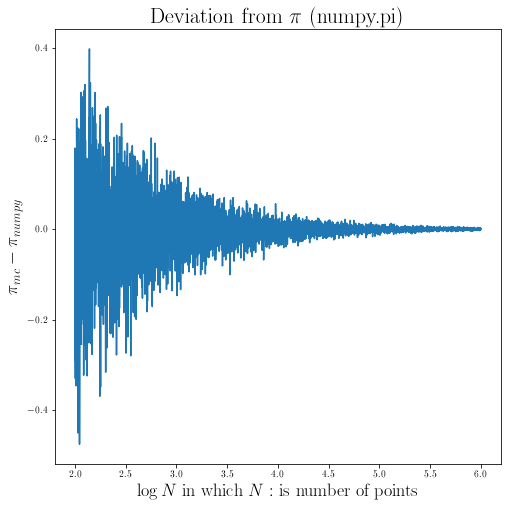

In [54]:
fig2 = plt.figure(figsize=(8,8))
plt.plot(np.log10(I), distance_from_pi)

plt.title(r"Deviation from $\pi$ (numpy.pi)", fontsize=22)
plt.xlabel(r"$\log{N}$ in which $N: $ is number of points", fontsize=18)
plt.ylabel(r"$\pi_{mc}-\pi_{numpy}$", fontsize=18)

plt.show()

### And as you would expect we are getting better and better by adding more points

Let's put the selection criteria of the circle inside a function. (This can be generalized easily to any arbitrary geometric criteria)

In [58]:
def impose_circle(distances, radius=1):
    """
    This is the function that takes an array `[distances]` 
    and a number (radius) and output an array of the similar
    size, and for those value<radius, assigns 1 and the rest 0
    """
    try:
        length_of_array = len(distances)
    except TypeError:
        length_of_array = 1
        
    selector = np.zeros(length_of_array)
    for i in range(length_of_array):
        if distances[i] <= radius:
            selector[i] = 1
    return selector

Now let's divide our points into two dictionaries: `inside_points` and `outside_points` 

In [62]:
selector = impose_circle(distance_from_0_0)

inside_points, outside_points = {}, {}

inside_points["x"] = x[selector == 1]
inside_points["y"] = y[selector == 1]

outside_points["x"] = x[selector == 0]
outside_points["y"] = y[selector == 0]

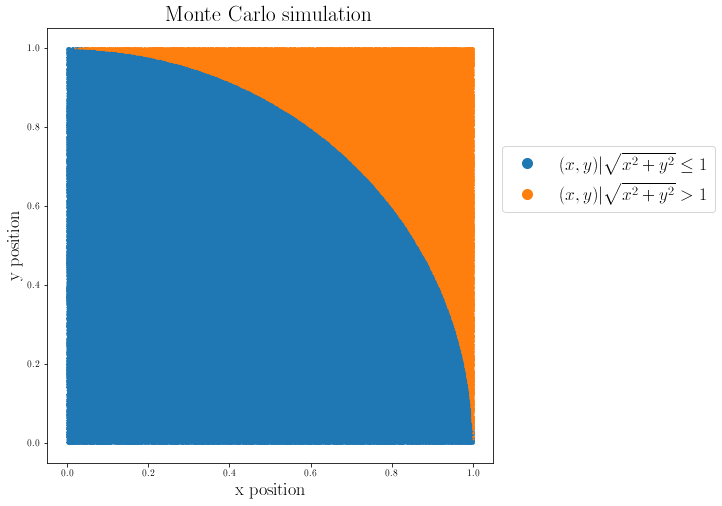

In [63]:
fig = plt.figure(figsize=(8,8))

plt.plot(inside_points["x"], inside_points["y"], '.', markersize=2, 
         label=r"$(x,y) | \sqrt{x^2+y^2} \leq 1 $")
plt.plot(outside_points["x"], outside_points["y"], '.', markersize=2, label=r"$(x,y) | \sqrt{x^2+y^2} > 1 $")

plt.title(r"Monte Carlo simulation", fontsize=22)

plt.xlabel(r"x position", fontsize=18)
plt.ylabel(r"y position", fontsize=18)

plt.legend(bbox_to_anchor=(1, 0.75), fontsize=18, markerscale=10)


plt.show()

### This is how our Monte Carlo simulation actually look like!

### Finding the area using **Monte Carlo** simulation:

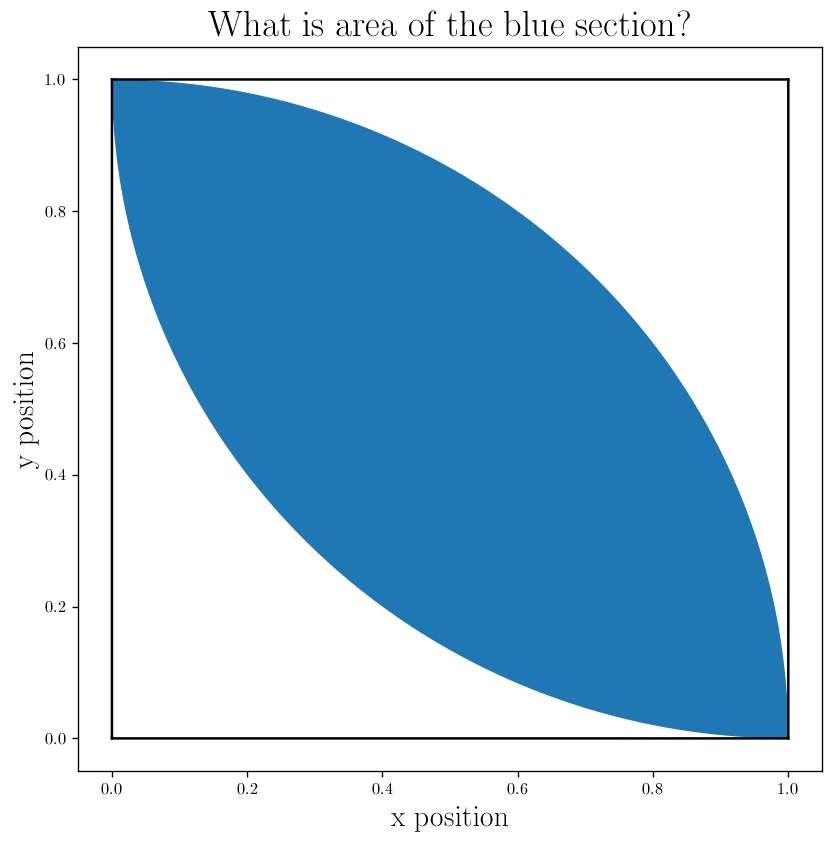

In [31]:
fig_pi = plt.figure(figsize=(8,8))


from matplotlib.patches import Rectangle
_number_of_points_=10**6

x = np.linspace(0,1, _number_of_points_)
# defing our curves (circle R^2 = X^2 + Y^2)
y = np.sqrt(1-x**2)
_y_ = 1 - np.sqrt(1-(x-1)**2)
# Fill the area between two circles
plt.fill_between(x,y,_y_)

# Making the square
y1 = np.ones(10**6)
y2 = np.zeros(10**6)

# make the square plot
plt.plot(x, y1, "k")
plt.plot(x, y2, "k")
plt.plot(y2, x, "k")
plt.plot(y1, x, "k")


plt.title(r"What is area of the blue section?", fontsize=22)

plt.xlabel(r"x position", fontsize=18)
plt.ylabel(r"y position", fontsize=18)


plt.show()

Let's do some **Monte Carlo** simulation again:

In [64]:
N = 10e4
N = int(N)

# points (orig is at 0, 0)
x = np.random.random(N)
y = np.random.random(N)

dist = np.sqrt(x**2 + y**2)

# points (orig is at 1, 1)

x_1 = np.ones(N) - x
y_1 = np.ones(N) - y

dist1 = np.sqrt(x_1**2 + y_1**2)

Now that we have our points let's apply the criteria:

In [65]:
selector = impose_circle(dist)
selector1 = impose_circle(dist1)

In [66]:
final_sel = selector1 * selector

In [67]:
_inside_points, _outside_points = {}, {}

_inside_points["x"] = x[final_sel == 1]
_inside_points["y"] = y[final_sel == 1]

_outside_points["x"] = x[final_sel == 0]
_outside_points["y"] = y[final_sel == 0]

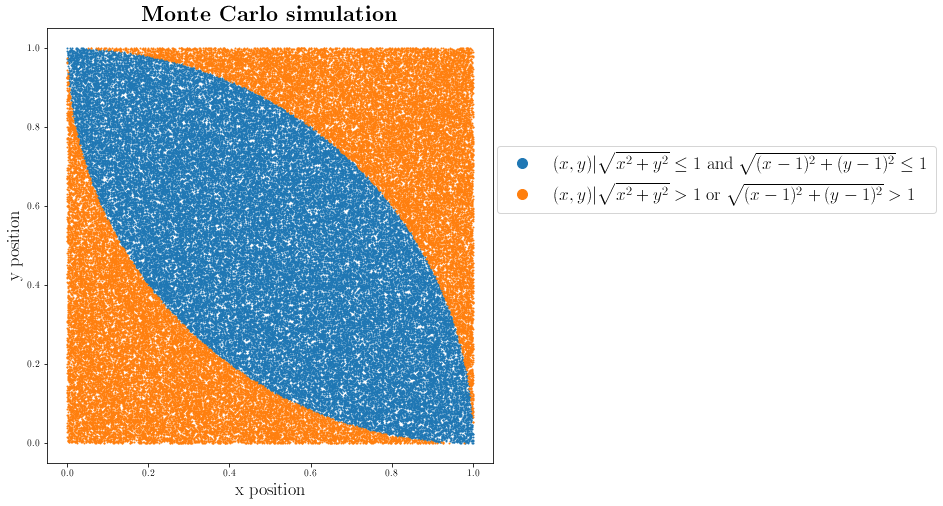

In [68]:
fig = plt.figure(figsize=(8,8))

plt.plot(_inside_points["x"], _inside_points["y"], '.', markersize=2, \
         label=r"$(x,y) | \sqrt{x^2+y^2} \leq 1$ and $\sqrt{(x-1)^2+(y-1)^2} \leq 1$")
plt.plot(_outside_points["x"], _outside_points["y"], '.', markersize=2, \
         label=r"$(x,y) | \sqrt{x^2+y^2} > 1 $ or $\sqrt{(x-1)^2+(y-1)^2} > 1$")

plt.title(r"\textbf{Monte Carlo simulation}", fontsize=22)

plt.xlabel(r"x position", fontsize=18)
plt.ylabel(r"y position", fontsize=18)

plt.legend(loc='upper center', bbox_to_anchor=(1.5, 0.75), fontsize=18, markerscale=10)


plt.show()

In [69]:
area_of_middle = len(_inside_points["x"]) / len(x)
area_of_middle

0.56992

## Machine Learning: Clustering and Classificaion 

### What is machine learning?

In traditional programming we mainly deal with an input and we need to explicitly write program for machine to produce a desired output but in the machine learning way of programming you will give the input and output (usually a smaller set of desired outputs) and the machine will find the right program to model output. 


### General idea:

* Take a set of examples. (training data)
* Infering some properties from the underlying model. (Model)
* Use the model found to predict future (unknown) data. (test set, new examples, ...)

Maching learning algorithm can be classified in two groups based on the available data:
* **Supervised learning:** In this set of algorithm we are dealing with a labeled dataset and we are trying to predict the label for future instances. Here we are trying to find the **conditional** probability for our variables given a set of known examples.

* **Unsupervised learning:** In these methods of learning we usually have a data set without any label and we are trying to find an underlying patterns. In the language of probability, we are trying to find the probability density of the inputs. We want to come up with a **priori** probability distribution.

We are going to see that the **Supervised learning** is basically an **optimization** problem. 

# **Clustering:**



Clustering is an optimization problem. But first let's define some useful concepts:

## **Variability** of a cluster: $V(c)$  
This shows how much difference exist between each element of the cluster and the mean of the cluster. 

$$
\begin{equation*}
V(c) = \sum_{x \in c} d(mean(c), x)
\end{equation*}
$$

In which $c$ is a cluster, and $d(x_0,x_1)$ is the distance between them.  [Euclidean](https://en.wikipedia.org/wiki/Euclidean_distance) or even [Minkowski](https://en.wikipedia.org/wiki/Minkowski_distance) distance)


## **Dissimilarity** of the set of clusters: $D(C)$

This is a measure for a aggregate variablility of a set of clusters. And it is defined as:


$$
\begin{equation*}
D(C) = \sum_{c \in C} V(c)
\end{equation*}
$$

### Quick note on $d(x_0,x_1)$: 

Usually we define the distance between two points to be _Euclidean_. 

If we take two vectors as $X, Y \in \mathbb{R}^M$, we define the Euclidean distance to be:


$$
\begin{equation*}
d(\vec{X}, \vec{Y}) = \sqrt{\sum_{i=1}^M (X_i-Y_i)^2}
\end{equation*}
$$


This is a special case for a more general class of distance definitions which are called the _Minkowski_ distance, which is defined as: 

$$
\begin{equation*}
d(\vec{X}, \vec{Y}) = \sqrt[n]{\sum_{i=1}^M (X_i-Y_i)^n}
\end{equation*}
$$

Mathematically speaking, this is a definition of $L^p$ spaces (_Lebesgue_ spaces) which themselves are part of Banach spaces.

Another special cases from Minkowski are the [Taxicab](https://en.wikipedia.org/wiki/Taxicab_geometry) distance (also known as Manhatan distance): 

$$
\begin{equation*}
d(\vec{X}, \vec{Y}) = \sum_{i=1}^M \|X_i-Y_i\|
\end{equation*}
$$


And the [ Tchebychev](https://en.wikipedia.org/wiki/Chebyshev_distance) distance:


$$
\begin{equation*}
d(\vec{X}, \vec{Y}) = \lim_{n \to \infty}{\sqrt[n]{\sum_{i=1}^M (X_i-Y_i)^n}}
\end{equation*}
$$


As an excersice, find the equivalent representation of a circle in 2-d Euclidian geometry, for different cases of n. 

Let's write the code for Minkowski distance:

In [75]:
def Minkowski_d(x1, x2, p=2):
    """ Function from L^p
    This is a function for defining a general distance measure between any 
    given N-dimensional vectors:     x1, x2
    
    INPUT:
    ------
           x1 (list or array of floats) : First vector
           x2 (list or array of floats) : Second vector
           p (float) : The power in our Minkowski definition 
    
    OUTPUT:
    -------
            (float) : The Minkowski distance of power p
                      between x1 and x2 
    """
    _sum_ = 0
    
    for x1_, x2_ in zip(x1, x2):
        diff_sq = pow(abs(x1_- x2_), p)
        _sum_ += diff_sq
    distance = pow(_sum_, 1/p)

    return distance

In [78]:
Minkowski_d([1, 5], [2, 3], p=2)

2.23606797749979

### Continuing on Variability of a cluster:

Now if you look at the definition of Variablity, you see that for the special case of Euclidean distance we are just missing a factor of $1/\sqrt{k}$ in which $k$ is the number of points in a given cluster, from the definition of [variance](https://en.wikipedia.org/wiki/Variance).


_What does it mean to not include the number of points in a cluster when calculating variability?_

By doing that we are assigning **higher variability** to the **larger** cluster than the smaller cluster of the **same variance**.



You may have guessed by now, that we are trying to come up with an objective function for our optimization problem. So we can ask for a set of clusters that would minimize the dissimilarity of the clusters.

But if we put a cluster on each point, we are going to get zero dissimilarity which obviously is not a useful answer. For avoiding this we need to define a constraint; for example, we can constrain the total distance between clusters to be smaller than some value, or enforce a maximum number for clusters.



# Hierarchical Clustering:

In this method of clustering we do the following:

_Naive algorithm:_

1. Assign a cluster to each point, so $N$ clusters for $N$ points.

2. Find the most similar clusters and merge them together. Now we have $N-1$ clusters.

3. We do the second part untill we get to a cluster that contains all of the $N$ points.


This is the [Agglomerative hierarchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering#Agglomerative_clustering_example).
 

Now we need to quantify what we mean by similarity (linkage) of two clusters.


These are **Linkage Metrics**:

1. **Single-linkage**:  It is the shortest distance between any member of one cluster and any memeber of another.


2. **Complete Linkage**: It is the greatest distance between any member of one cluster and any memeber of another.


3. **Average Linkage**: It is the average distance between any member of one cluster and any memeber of another.